In [26]:
import numpy as np
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.bindings.sdr import SDR
from htm.algorithms import SpatialPooler as SP
from htm.bindings.algorithms import Classifier

categories = {"cat":0, "dog":1, "monkey":2, "slow loris":3}

scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 0
scalarEncoderParams.maximum = 3
scalarEncoderParams.activeBits = 4
scalarEncoderParams.category = True

enc = ScalarEncoder(scalarEncoderParams)

In [27]:
print ("cat = ", enc.encode(0))
print ("dog = ", enc.encode(1))
print ("monkey = ", enc.encode(2))
print ("slow loris =", enc.encode(3))

cat =  SDR( 16 ) 0, 1, 2, 3
dog =  SDR( 16 ) 4, 5, 6, 7
monkey =  SDR( 16 ) 8, 9, 10, 11
slow loris = SDR( 16 ) 12, 13, 14, 15


In [28]:
inputSDR  = SDR( dimensions = (16, ) )
activeSDR = SDR( dimensions = (256, ) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

In [29]:
clsr = Classifier()

In [30]:
batchSize=3
for n in range(batchSize):
    for i in range(len(categories)):
        inputSDR=enc.encode(i)
        sp.compute(inputSDR, True, activeSDR)
        print("Active Outputs: ",activeSDR)
        clsr.learn( activeSDR, list(categories.values())[i]  )
        print("Classifier learn: ",list(categories)[i] )

Active Outputs:  SDR( 256 ) 217, 233, 240, 244, 250
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 130, 143, 165, 195, 208
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 133, 212, 218, 242, 245
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 2, 78, 129, 161, 238
Classifier learn:  slow loris
Active Outputs:  SDR( 256 ) 217, 233, 240, 244, 250
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 130, 143, 165, 195, 208
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 133, 212, 218, 242, 245
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 2, 78, 129, 161, 238
Classifier learn:  slow loris
Active Outputs:  SDR( 256 ) 217, 233, 240, 244, 250
Classifier learn:  cat
Active Outputs:  SDR( 256 ) 130, 143, 165, 195, 208
Classifier learn:  dog
Active Outputs:  SDR( 256 ) 133, 212, 218, 242, 245
Classifier learn:  monkey
Active Outputs:  SDR( 256 ) 2, 78, 129, 161, 238
Classifier learn:  slow loris


In [31]:
for i in range(4):
    inputSDR=enc.encode(i)
    sp.compute(inputSDR, False, activeSDR)
    print("Active Outputs: ",activeSDR)
    pdf = clsr.infer( activeSDR )
    print("PDF: ",pdf)
    predict = list(categories)[np.argmax( pdf )]  
    print("predict index: ",predict)

Active Outputs:  SDR( 256 ) 217, 233, 240, 244, 250
PDF:  [0.2518785027130525, 0.24937383014676484, 0.24937383014676484, 0.24937383014676484]
predict index:  cat
Active Outputs:  SDR( 256 ) 130, 143, 165, 195, 208
PDF:  [0.24875079073740058, 0.2525054412062263, 0.24937189105374996, 0.24937189105374996]
predict index:  dog
Active Outputs:  SDR( 256 ) 133, 212, 218, 242, 245
PDF:  [0.24895699547843136, 0.24895699547843136, 0.2527147544654033, 0.24937123290705152]
predict index:  monkey
Active Outputs:  SDR( 256 ) 2, 78, 129, 161, 238
PDF:  [0.24906016605245862, 0.24906016605245862, 0.24906016605245862, 0.2528194803242461]
predict index:  slow loris


In [32]:
catdog=[1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0]
inputSDR = SDR(dimensions = (16, ))
inputSDR.dense = np.array(catdog)
print(inputSDR)

SDR( 16 ) 0, 1, 3, 5


In [33]:
sp.compute(inputSDR, False, activeSDR)
print("Active Outputs: ",activeSDR)
pdf = clsr.infer( activeSDR )
print("PDF: ",pdf)
predict = list(categories)[np.argmax( pdf )]  
print("predict index: ",predict)

Active Outputs:  SDR( 256 ) 208, 217, 223, 240, 248
PDF:  [0.2505001278091129, 0.25024944045838127, 0.24962522343597998, 0.24962522343597998]
predict index:  cat


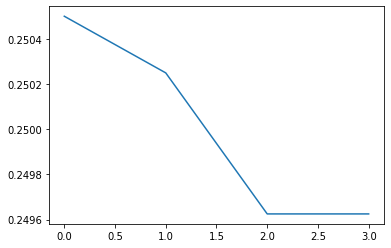

In [34]:
import matplotlib.pyplot as plt
plt.plot(clsr.infer( activeSDR ))
plt.show()